In [14]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://github.com/jesugome/InfluencersInSocialNetworks/raw/master/logoAnalytics.png")

<h2><center>
# Birds

![Image of Yaktocat](http://tremendouswallpapers.com/wp-content/uploads/2014/12/Venette-Waste_Trend-F-W-14-15_Neat-Graphics_mandarin-duck.jpg)
    
 ## Machine Learning Project

Developed by [Jesus Solano](http://www.jesussolano.com/) -- [Sergio Castelblanco](http://www.jesussolano.com/) -- [Jose Sandoval](http://www.jesussolano.com/) -- [Aleksey Sepulveda](http://www.jesussolano.com/)


version 8.3, June 24 2018

In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1Ys08yalsbM29fvvPhyDxv-SV7TBg3VxK'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])

In [2]:
# Download datasets.
import os.path
from google.colab import files

if not os.path.exists('birds.zip'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds.zip
    
if not os.path.exists('birds_f_numbers.txt'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds_f_numbers.txt
    
if not os.path.exists('birds_training_pairs.txt'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds_training_pairs.txt 


In [3]:
import os 
import zipfile
with zipfile.ZipFile("birds.zip","r") as zip_ref:
    zip_ref.extractall(os.getcwd())
    


In [4]:
! ls

birds		     birds_training_pairs.txt  cnn_data.zip  drive
birds_f_numbers.txt  birds.zip		       datalab


In [5]:
! ls birds/egret/

egr001.jpg  egr018.jpg	egr035.jpg  egr052.jpg	egr069.jpg  egr086.jpg
egr002.jpg  egr019.jpg	egr036.jpg  egr053.jpg	egr070.jpg  egr087.jpg
egr003.jpg  egr020.jpg	egr037.jpg  egr054.jpg	egr071.jpg  egr088.jpg
egr004.jpg  egr021.jpg	egr038.jpg  egr055.jpg	egr072.jpg  egr089.jpg
egr005.jpg  egr022.jpg	egr039.jpg  egr056.jpg	egr073.jpg  egr090.jpg
egr006.jpg  egr023.jpg	egr040.jpg  egr057.jpg	egr074.jpg  egr091.jpg
egr007.jpg  egr024.jpg	egr041.jpg  egr058.jpg	egr075.jpg  egr092.jpg
egr008.jpg  egr025.jpg	egr042.jpg  egr059.jpg	egr076.jpg  egr093.jpg
egr009.jpg  egr026.jpg	egr043.jpg  egr060.jpg	egr077.jpg  egr094.jpg
egr010.jpg  egr027.jpg	egr044.jpg  egr061.jpg	egr078.jpg  egr095.jpg
egr011.jpg  egr028.jpg	egr045.jpg  egr062.jpg	egr079.jpg  egr096.jpg
egr012.jpg  egr029.jpg	egr046.jpg  egr063.jpg	egr080.jpg  egr097.jpg
egr013.jpg  egr030.jpg	egr047.jpg  egr064.jpg	egr081.jpg  egr098.jpg
egr014.jpg  egr031.jpg	egr048.jpg  egr065.jpg	egr082.jpg  egr099.jpg
egr015.jpg  egr032.jpg	egr049.jpg 

Using TensorFlow backend.


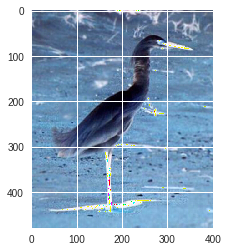

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('birds/egret/egr034.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(x)

In [7]:
import random

randomList= random.sample(range(1,101),100)

formating = "{:03d}".format

formatedList = [formating(item) for item in randomList]

In [45]:
os.mkdir('datasets/train/')

FileNotFoundError: ignored

In [11]:
! ls

birds		     birds_training_pairs.txt  cnn_data.zip  drive
birds_f_numbers.txt  birds.zip		       datalab


In [12]:
from shutil import copy
counter = 0

! mkdir datasets/train

for i in formatedList[:]:
   if counter < 50:
      copy('birds/egret/egr'+i+'.jpg','datasets/train/egr'+i+'.jpg')
      counter=counter+1

mkdir: cannot create directory ‘datasets/train’: File exists


In [39]:
! ls

birds_f_numbers.txt	  birds.zip	datalab
birds_training_pairs.txt  cnn_data.zip	drive


In [41]:
! ls datalab

adc.json


In [149]:
! ls datasets/train


egr002.jpg  egr024.jpg	egr036.jpg  egr056.jpg	egr069.jpg  egr088.jpg
egr004.jpg  egr025.jpg	egr037.jpg  egr057.jpg	egr074.jpg  egr091.jpg
egr008.jpg  egr028.jpg	egr039.jpg  egr058.jpg	egr075.jpg  egr096.jpg
egr012.jpg  egr029.jpg	egr041.jpg  egr059.jpg	egr076.jpg  egr099.jpg
egr013.jpg  egr030.jpg	egr047.jpg  egr060.jpg	egr077.jpg  egr100.jpg
egr014.jpg  egr031.jpg	egr048.jpg  egr061.jpg	egr079.jpg
egr018.jpg  egr033.jpg	egr050.jpg  egr063.jpg	egr083.jpg
egr019.jpg  egr034.jpg	egr052.jpg  egr064.jpg	egr084.jpg
egr021.jpg  egr035.jpg	egr055.jpg  egr067.jpg	egr086.jpg


In [37]:
! ls datalab/

adc.json  birds_f_numbers.txt


In [0]:
### resize images

from PIL import Image

basewidth = 256
hsize = 256
img = Image.open('Birds.jpg')
wpercent = (basewidth/float(img.size[0]))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img.save('sompic1.jpg') 

In [0]:
https://colab.research.google.com/drive/1zB5kzpdKaESIsn66rvktauLuVBNG-J1h